In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats

In [2]:
data_pca = pd.read_csv("out_energy/pca_hombres.csv",index_col=0)

In [3]:
data_pca

,0,1,2,3,4,5,6,7,8,9,10,11
6,0.033195,-0.048130,0.123535,0.028333,0.043859,0.016134,-0.006624,0.009809,-0.010134,-0.010214,0.014602,0.012430
12,0.103991,0.013038,-0.053619,0.013765,0.056307,-0.029368,-0.007349,0.053367,0.004893,-0.009583,0.001650,-0.011094
13,0.067572,0.039668,0.041236,-0.047496,-0.001407,-0.039892,0.002777,-0.014028,0.010286,0.023520,-0.008970,-0.006311
15,-0.013820,-0.047883,-0.003662,0.005914,-0.002041,-0.027317,0.059758,0.007642,0.017191,0.024735,0.015773,0.023333
18,-0.017690,0.131119,0.023143,0.032801,0.001862,0.006611,0.016165,-0.023628,0.042211,-0.014826,-0.012436,0.017431
19,0.017646,-0.038350,-0.027176,-0.027011,0.012561,-0.002525,-0.000777,-0.020508,0.010414,-0.030224,0.019318,0.014695
26,-0.027068,-0.010858,-0.007895,-0.004931,0.035201,-0.039813,0.014883,-0.052385,-0.042091,-0.013405,-0.030921,-0.003005
28,-0.043989,-0.012457,0.008677,0.034742,-0.053820,-0.025375,-0.030047,0.032319,0.005233,-0.003972,-0.017661,0.019687
30,-0.075964,0.020984,0.012451,0.034285,0.026678,-0.017540,-0.046065,-0.011889,-0.002370,0.005824,0.028484,-0.022027
33,-0.061606,-0.047399,-0.023634,0.030449,-0.006987,-0.001211,-0.006041,0.002536,0.023141,-0.032809,0.003368,-0.012098


In [4]:
x_out_total = np.array(data_pca.iloc[:])
ids = np.array(data_pca.index)
del data_pca

In [5]:
data_planillas = pd.read_excel("./planilla_colecta.xlsx")
data_planillas = data_planillas[data_planillas['id'].isin(ids)]
sexo = data_planillas["sexo"].iloc[:].tolist() 
body_fat_range = data_planillas["Body fat range"].iloc[:].tolist() 
peso = data_planillas["peso"].iloc[:].tolist() 
altura = data_planillas["promedio altura"].iloc[:].tolist()
cint = data_planillas["promedio cir cin"].iloc[:].tolist()
cad = data_planillas["promedio cir cad"].iloc[:].tolist()

In [6]:
def bmi_cal(bmi):
    if 18.5 > bmi:
        return "underfat"
    if 18.5 <= bmi < 25:
        return "healthy"
    if 25 <= bmi < 30:
        return "overfat"
    if 30 <= bmi:
        return "obese"

In [7]:
bmis =  list(map( lambda pa: bmi_cal(pa[0] / (pa[1]/100*pa[1]/100))  ,zip(peso,altura)))

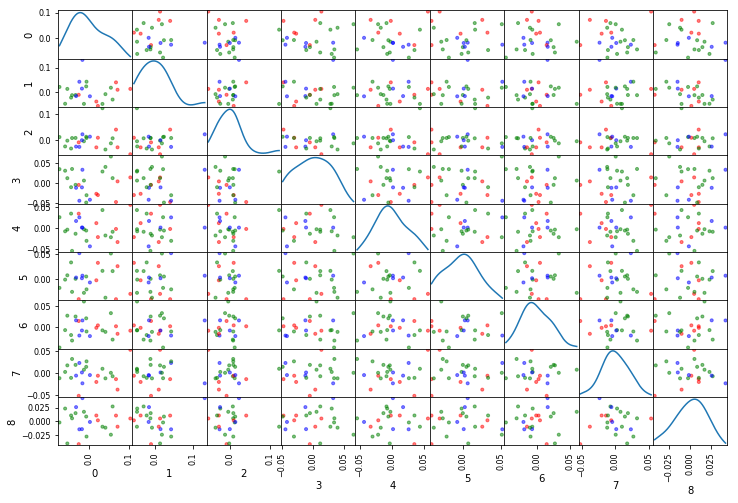

In [8]:
interest_feat = range(10)
data = pd.DataFrame(x_out_total)
data["labels"]= bmis
color_wheel = {"healthy": "red", "obese": "blue","overfat":"green","underfat":"black","desconocido":"yellow"}
colors = data["labels"].map(lambda x: color_wheel.get(x.lower()))
pd.scatter_matrix(data.loc[:,interest_feat[:-1]], figsize=(12,8), diagonal='kde',label=data.loc[:,"labels"],c=colors)
plt.show()
del data,color_wheel

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


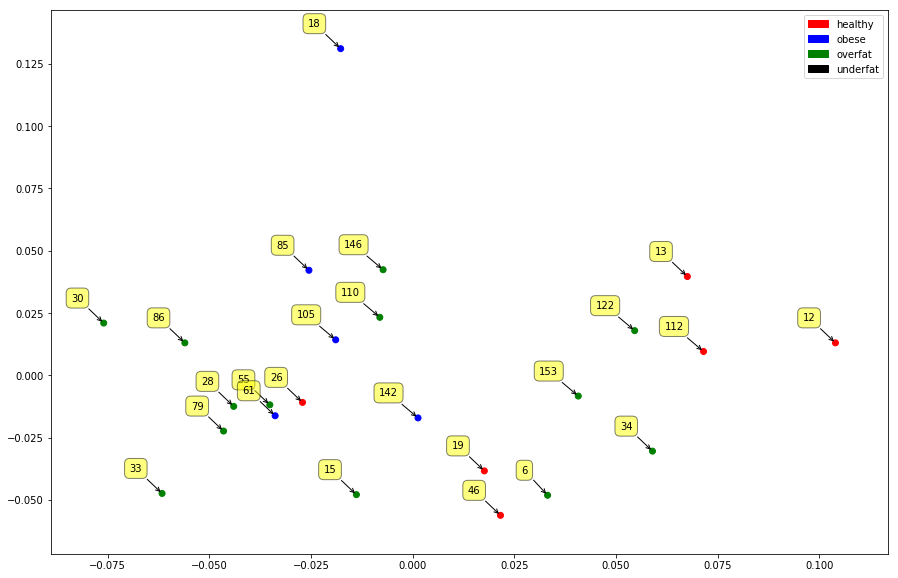

In [9]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_out_total[:,0],x_out_total[:,1],c=colors,marker="o")

red_patch = mpatches.Patch(color='red', label='healthy')
green_patch = mpatches.Patch(color='green', label='overfat')
blue_patch = mpatches.Patch(color='blue', label='obese')
black_patch = mpatches.Patch(color='black', label='underfat')
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch])

for label, x, y in zip(np.array(sorted(ids)), x_out_total[:,0], x_out_total[:,1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.legend(loc='best')

plt.show()

In [10]:
data_planillas

,id,fecha de colecta,sexo,edad,peso,altura 1,altura 2,promedio altura,cir cin 1,cir cin 2,...,Mass,Body fat range,Fat free mass,Body water%,Mass.1,Muscle mass,observaciones,Contacto,Pass,link
5,6,2016-07-11,m,NaN,79.2,170.6,170.5,170.6,85.5,85.3,...,11.5,Healthy,67.7,59.6,47.2,64.3,NaN,https://www.facebook.com/norman.jones.10441,47cb4e7ada2653f15c05,https://sketchfab.com/models/109f7133f51f4f098...
11,12,2016-07-11,m,NaN,81.8,190.0,190.5,190.3,93.0,92.8,...,7.9,Healthy,73.9,60.3,49.3,70.2,NaN,fede@cenpat-conicet.gob.ar,3ccaf0eea543a9ea315d,https://sketchfab.com/models/1063fcf8464246009...
12,13,2016-07-11,m,NaN,65.5,171.0,171.2,171.1,85.0,85.0,...,6.6,Healthy,58.9,61.5,40.3,55.9,NaN,jicuiti@yahoo.com.ar,e13a5662e46424e3d332,https://sketchfab.com/models/c647fef101e24e4c8...
14,15,2016-07-13,m,1980-11-30 00:00:00,75.6,172.4,172.4,172.4,87.6,87.7,...,17.6,Healthy,58.0,53.1,40.1,55.0,NaN,emilianocesari10@hotmail.com,32f53a37534354ef3685,https://sketchfab.com/models/dea6ad40b364411c8...
17,18,2016-07-13,m,1948-06-18 00:00:00,84.9,162.5,162.5,162.5,110.4,110.5,...,23.9,overfat,61.0,51.5,43.7,58.0,NaN,haller@cenpat-conicet.gob.ar,93a0aaf6f167dbc84939,https://sketchfab.com/models/a9c58f9656044f808...
18,19,2016-07-13,m,1983-06-17 00:00:00,75.9,175.0,175.2,175.1,92.6,92.8,...,12.7,Healthy,63.2,58.4,44.3,60.0,NaN,l.cheme.arriaga@gmail.com,3d27beea29dc958730ca,https://sketchfab.com/models/ebafa382143e4fb7a...
25,26,2016-07-13,m,1977-07-12 00:00:00,76.1,192.0,192.0,192.0,91.3,91.0,...,10.0,Healthy,66.1,57.3,43.6,62.7,NaN,cannizzaro@cenpat-conicet.gob.ar,32646b74353171967d85,https://sketchfab.com/models/0be9c5d3d94e425f9...
27,28,2016-07-13,m,1973-09-24 00:00:00,72.6,165.4,166.0,165.7,89.0,89.5,...,16.1,overfat,56.5,55.6,40.4,53.7,NaN,rgonzalezjose@gmail.com,1ba4988a8f573c653f0d,https://sketchfab.com/models/d52cecbf0b604c048...
29,30,2016-07-15,m,1942-09-16 00:00:00,78.1,169.0,168.8,168.9,103.8,104.0,...,28.3,Obese,49.8,45.9,35.8,47.3,NaN,patopla42@hotmail.com,d6963fbf68b26c6b01f2,https://sketchfab.com/models/2dcf5fa834ff462da...
32,33,2016-07-15,m,1977-04-08 00:00:00,74.9,165.4,165.5,165.5,94.0,94.5,...,19.9,Obese,55.0,53.1,39.8,52.2,NaN,pedroahamdan@yahoo.com.ar,19f70acae5b1d9e57c3f,https://sketchfab.com/models/9c2f2dae592d4dcdb...


In [11]:
filtro = (ids!=113)

In [12]:
x_out_total = x_out_total[filtro]

In [13]:
fat_free_mass = np.array(data_planillas["Fat free mass"])

In [14]:
fat_free_mass = fat_free_mass[filtro]

r-squared: 0.17920728505204933
p-value: 0.039280631448399835


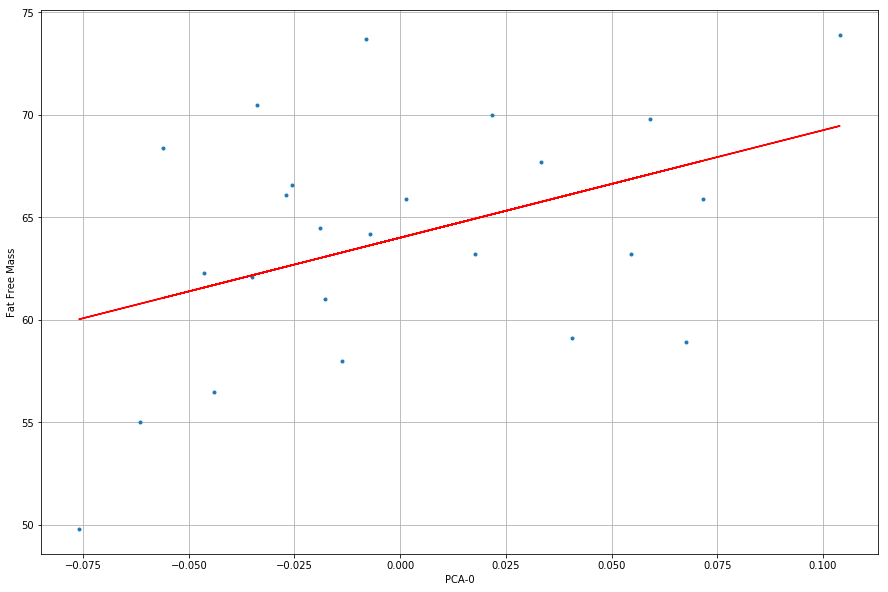

In [17]:
x = x_out_total[:,0] 
y = fat_free_mass
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('Fat Free Mass')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# for label, x, y in zip(np.array(sorted(ids)), x, y):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.grid(True)
plt.show()

In [18]:
body_fat_porcent = np.array(data_planillas["Body fat%"])

In [19]:
body_fat_porcent = body_fat_porcent[filtro]

r-squared: 0.5131049759855838
p-value: 8.25356884785087e-05


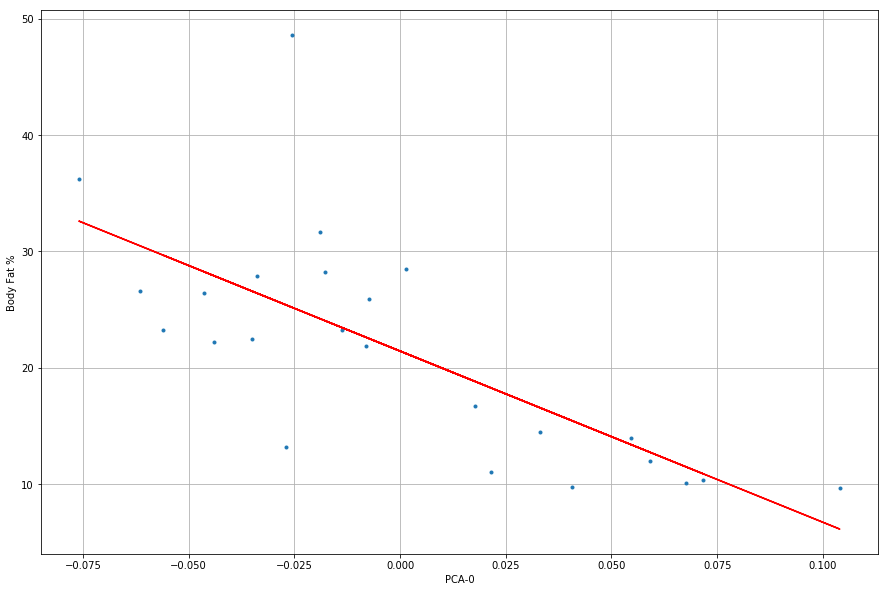

In [21]:
x = x_out_total[:,0] 
y = body_fat_porcent
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('Body Fat %')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

r-squared: 0.03527400309810359
p-value: 0.3794903846391877


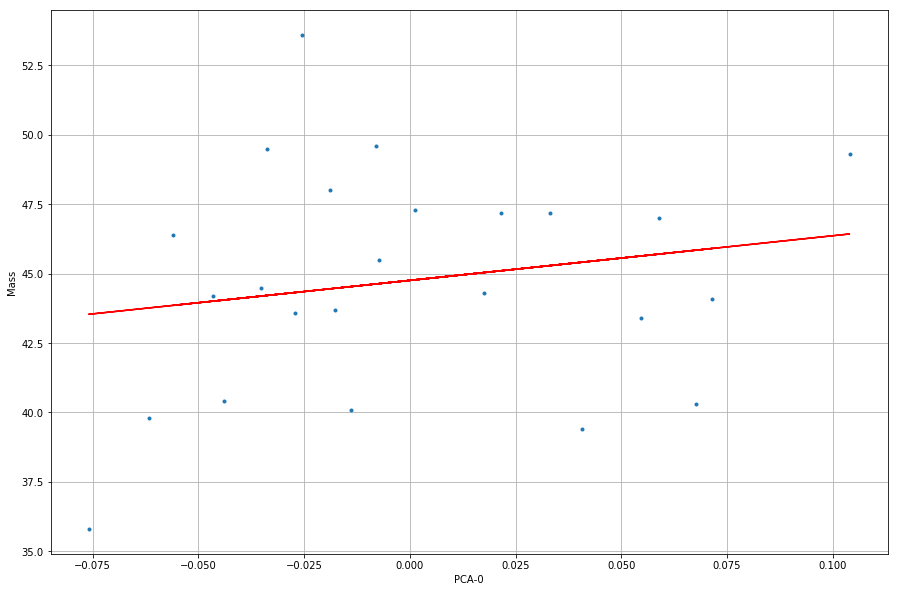

In [24]:
mass = np.array(data_planillas["Mass.1"])
mass = mass[filtro]
x = x_out_total[:,0] 
y = mass
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('Mass')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

r-squared: 0.17064830461375435
p-value: 0.04481922767165095


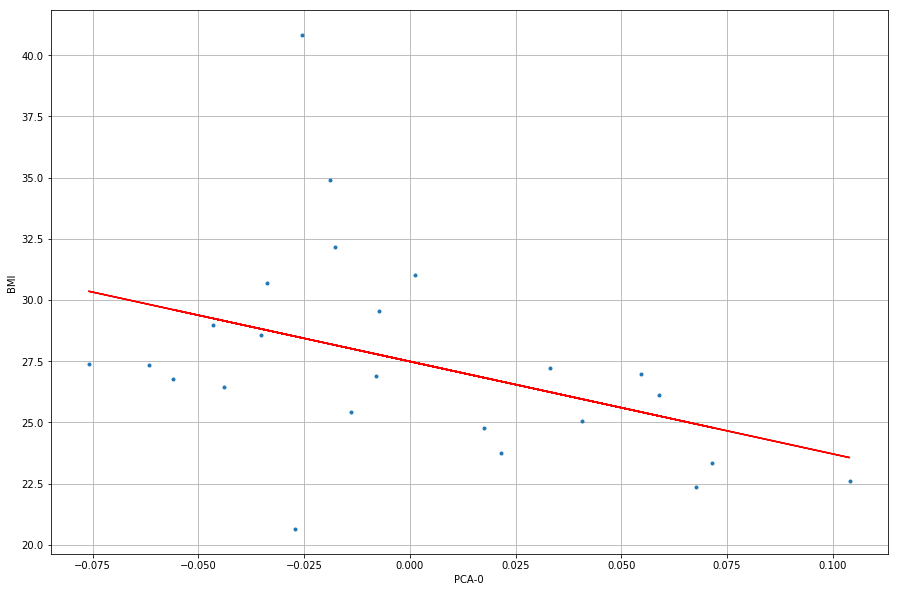

In [27]:
bmi = list(map( lambda pa: (pa[0] / (pa[1] / 100 *pa[1] / 100))  ,zip(peso,altura)))
bmi = np.array(bmi)[filtro]
x = x_out_total[:,0] 
y = bmi
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('BMI')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

r-squared: 0.28162866081823124
p-value: 0.007631408713265695


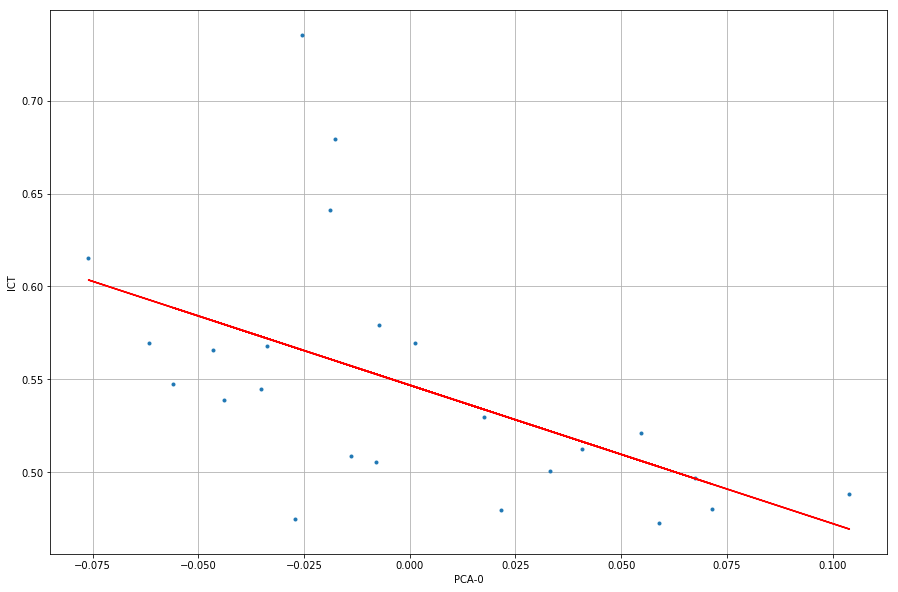

In [30]:
ict = np.array(cint)/np.array(altura)
ict = np.array(ict)[filtro]
x = x_out_total[:,0] 
y = ict
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('ICT')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

r-squared: 0.3303872036508228
p-value: 0.0033036226362172334


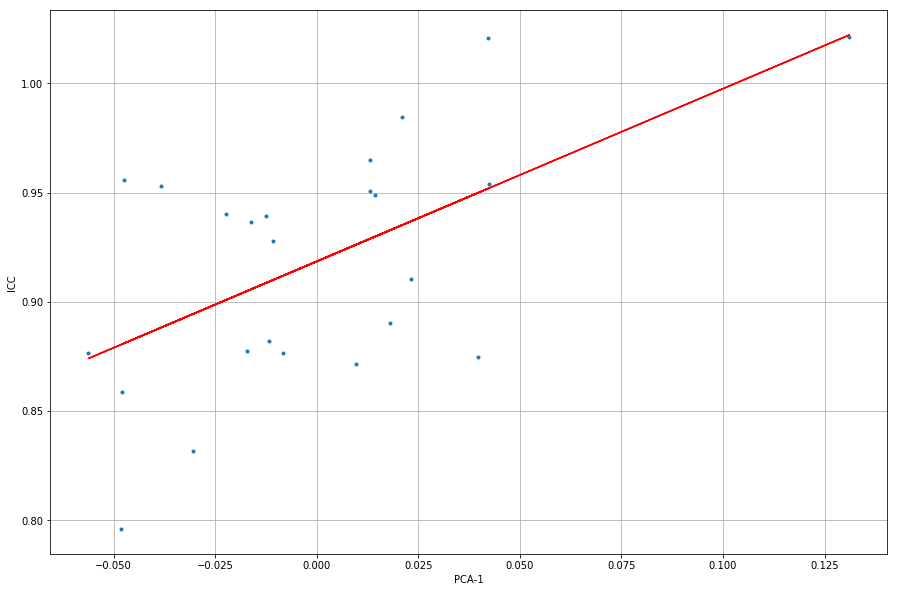

In [34]:
icc = np.array(cint)/np.array(cad)
icc = np.array(icc)[filtro]
x = x_out_total[:,1] 
y = icc
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-1')
plt.ylabel('ICC')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

r-squared: 0.1794232221747459
p-value: 0.039149872796454044


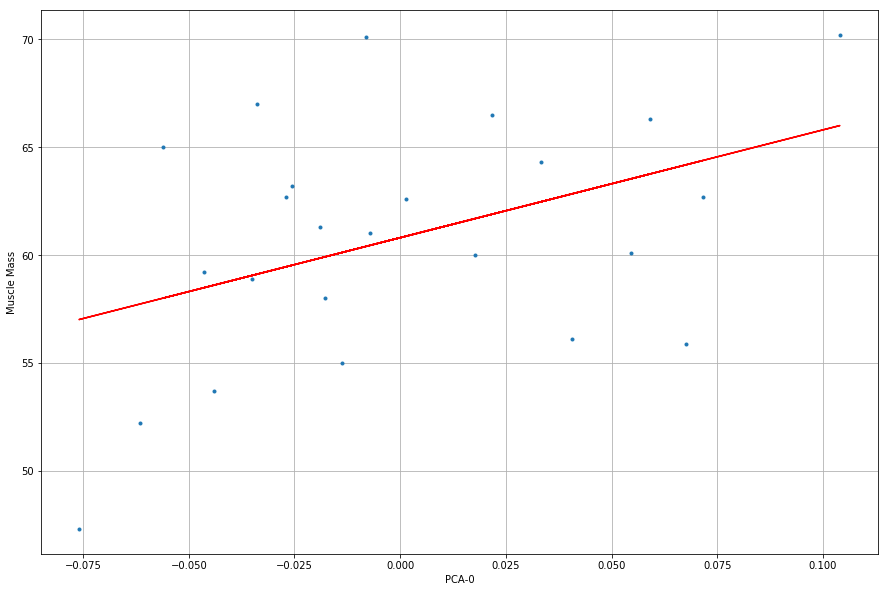

In [37]:
muscle_mass = np.array(data_planillas["Muscle mass"])
muscle_mass = muscle_mass[filtro]
#muscle_mass[muscle_mass.argmin()] = 0
#filtro_muscle = muscle_mass != 0
x = x_out_total[:,0]
#x = x[filtro_muscle]
y = muscle_mass
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared: {}".format(r_value**2))
print("p-value: {}".format(p_value))
plt.plot(x , y,".")
plt.xlabel('PCA-0')
plt.ylabel('Muscle Mass')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.grid(True)
plt.show()

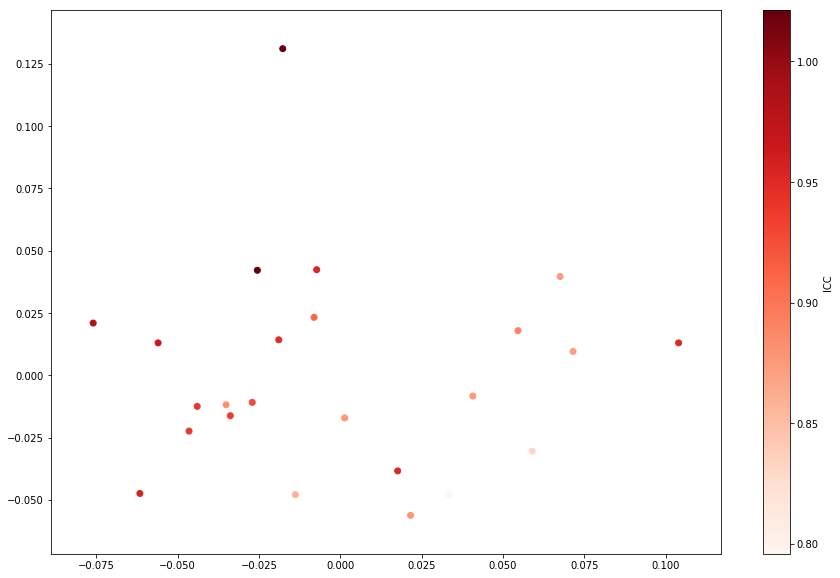

In [38]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
s = ax.scatter(x_out_total[:,0],x_out_total[:,1],c=icc,marker="o",cmap=plt.cm.Reds,vmax=icc.min(),vmin=icc.max())
cbar = plt.colorbar(mappable=s)
cbar.set_label('ICC')
plt.show()

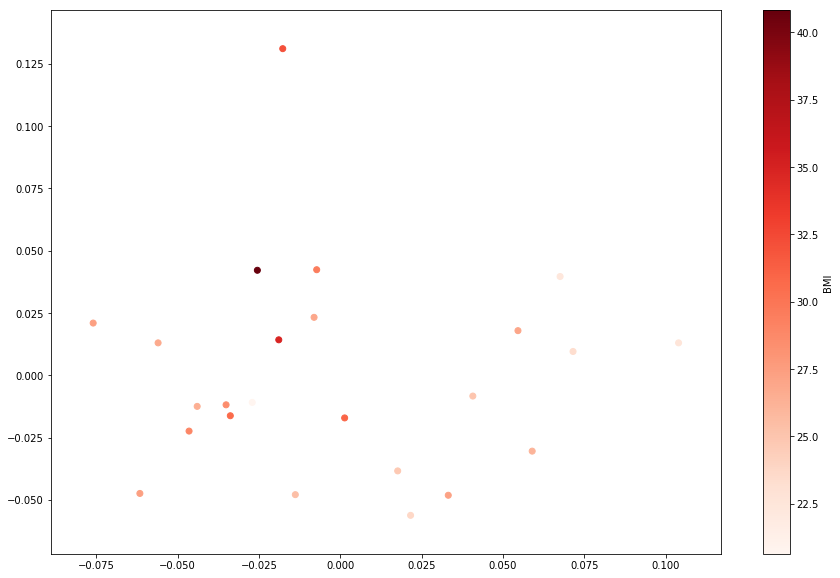

In [39]:
plt.rcParams["figure.figsize"] = [15,10]
fig = plt.figure()
ax = fig.add_subplot(111)
s = ax.scatter(x_out_total[:,0],x_out_total[:,1],c=bmi,marker="o",cmap=plt.cm.Reds,vmax=bmi.min(),vmin=bmi.max())
cbar = plt.colorbar(mappable=s)
cbar.set_label("BMI")
plt.show()